Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions

In [20]:
# pip install tensorflow
import tensorflow as tf
import keras
import time
print(tf.__version__) # Tensorflow version
print(keras.__version__) # Keras Version

2.14.0
2.14.0


Q2. Load the Wine Quality dataset and explore its dimensions

In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
df = pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Q3. Check for null values, identify categorical variables, and encode them.

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [24]:
# Encoding of the category in classes
df['quality'] = np.where(df['quality'].str.contains('bad'),0,1)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [26]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Separate the features and target variables from the dataframe.

In [28]:
## Independent and Dependent features
X = df.iloc[: , : -1 ] ## Independent features
y = df.iloc[: ,-1]  ## Dependent feature

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [29]:
## Spliting the dataset into Training and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8


Q6. Perform scaling on the dataset

In [31]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
Q8. Create a Sequential model and add all the layers to it.

In [33]:
## Now create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, LeakyReLU
from tensorflow.keras.layers import Dropout


In [34]:
### Lets initialize the ANN
classifier = Sequential()
## Adding the input Layer
classifier.add(Dense(units = 11,activation = 'relu'))
## Adding first hidden layer
classifier.add(Dense(units = 7, activation= 'relu'))
classifier.add(Dropout(0.2))
## Adding Second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))
classifier.add(Dropout(0.2))
## Adding the Output layer
classifier.add(Dense(1,activation = 'sigmoid'))



Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [35]:
# Creating a function for saving the logs at proper folder
def get_log_path(log_dir="logs/fit"):
 filename = time.strftime("1_log_%y_%m_%d_%H_%M_%S")
 logs_path = os.path.join(log_dir,filename)
 print(f"Saving logs at {logs_path}")
 return logs_path

In [36]:
# Creating logs callback
log_dirs = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dirs)

Saving logs at logs/fit/1_log_23_12_13_17_10_17


Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed


In [37]:
# Creating early stopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [38]:
# Saving the model with callback
CKPT_path = os.path.join("Models","Model_ckpt_Digit_mnist_1.h5")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)


Q12. Print the model summary.

In [40]:
# Build the model
classifier.build(input_shape=(None, 11))
model_summary = classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 7)                 84        
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_6 (Dense)             (None, 6)                 48        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.0

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
Q14. Compile the model with the specified loss function, optimizer, and metrics

In [42]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
EPOCHS = 50 # Number of Epochs
VALIDATION_SET = (x_valid,y_valid) # Validation data
history = model.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=64, # Training the model
 callbacks=[tb_cb,early_stopping_cb,checkpoint_cb],use_multiprocessing=True

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [43]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[tb_cb,early_stopping_cb,checkpoint_cb],use_multiprocessing=True)

Epoch 1/100
86/86 [==============================] - 7s 7ms/step - loss: 0.6725 - accuracy: 0.6110 - val_loss: 0.5782 - val_accuracy: 0.7329
Epoch 2/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.6974 - val_loss: 0.5184 - val_accuracy: 0.7281
Epoch 3/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.6904 - val_loss: 0.5194 - val_accuracy: 0.7329
Epoch 4/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5565 - accuracy: 0.7243 - val_loss: 0.5017 - val_accuracy: 0.7329
Epoch 5/100
86/86 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7395 - val_loss: 0.5003 - val_accuracy: 0.7447
Epoch 6/100
86/86 [==============================] - 1s 8ms/step - loss: 0.5344 - accuracy: 0.7348 - val_loss: 0.4936 - val_accuracy: 0.7400
Epoch 7/100
86/86 [==============================] - 1s 7ms/step - loss: 0.5334 - accuracy: 0.7442 - val_loss: 0.5015 - val_accuracy: 0.7518
Epoch 8/100
8

Q16. Get the model's parameters.

In [44]:
hidden1 =classifier.layers[0]
hidden1.get_weights() # The weights of first hidden layer

[array([[-0.77548456, -0.2177655 ,  0.07557765,  0.07553828,  0.29879957,
         -0.68161356,  0.10330823, -0.1944453 ,  0.01476835, -0.0356089 ,
          0.17672926],
        [ 0.00162923, -0.05213027,  0.44942728, -0.25080422, -0.34613273,
          0.05267055,  0.4800038 , -0.2708689 , -0.7522424 , -0.53412396,
         -0.0786408 ],
        [ 0.26050806,  0.25245854,  0.4286591 , -0.292502  , -0.37591663,
          0.04684661, -0.05100611, -0.51333094,  0.52646613, -0.40311545,
          0.24914782],
        [-0.14972489, -0.5060313 ,  0.06845241, -0.12589039, -0.48047876,
         -0.1063147 , -0.47618538,  0.29147145,  0.00924143, -0.19455135,
          0.60533863],
        [ 0.41619715, -0.13962646, -0.06672011, -0.06283863,  0.06628356,
          0.18063013,  0.08188045, -0.31288445,  0.04443785, -0.05088066,
         -0.46235844],
        [-0.44470888,  0.32731077, -0.22386974, -0.39240944, -0.07707271,
          0.39312568,  0.2932953 , -0.14862628,  0.30264682,  0.4169769

Q17. Store the model's training history as a Pandas DataFrame.

In [45]:
pd.DataFrame(model_history.history) # All the losses and accuracy in each epoch

,loss,accuracy,val_loss,val_accuracy
0,0.672540,0.610981,0.578157,0.732861
1,0.582329,0.697430,0.518421,0.728132
2,0.572132,0.690421,0.519414,0.732861
3,0.556545,0.724299,0.501709,0.732861
4,0.546732,0.739486,0.500267,0.744681
5,0.534428,0.734813,0.493606,0.739953
6,0.533358,0.744159,0.501514,0.751773
7,0.530898,0.750000,0.506023,0.747045
8,0.511519,0.755841,0.502105,0.763593
9,0.506494,0.758178,0.516244,0.754137


Q18. Plot the model's training history.

<Axes: >

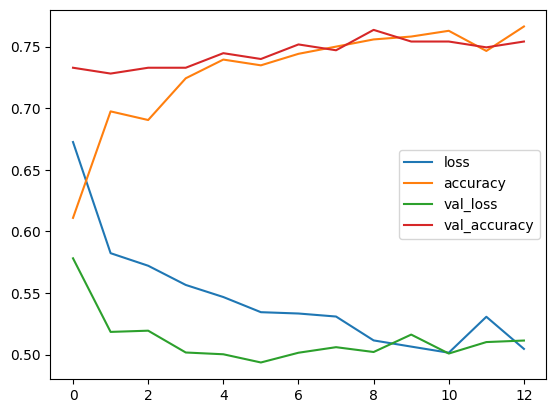

In [46]:
pd.DataFrame(model_history.history).plot() # Plotting all of the accuracy and losses

19. Evaluate the model's performance using the test data.

In [47]:
## Part 3, Making Pridictions and evaluting the model
# Pridicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

10/10 [==============================] - 0s 2ms/step
